In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [81]:
# Load the CSV with vectors stored as lists in a column
df = pd.read_csv('processed_df2.csv')
df['vector'] = df['vector'].apply(eval)  # Convert stringified lists to actual lists

In [82]:
# Stack vectors into a 2D array
X = np.stack(df['vector'].values)

# Run KMeans for k = 1 to 40
inertias = []
K_range = range(1, 40)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\Users\pradh\AppData\Local\Temp\ipykernel_5024\3898492291.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


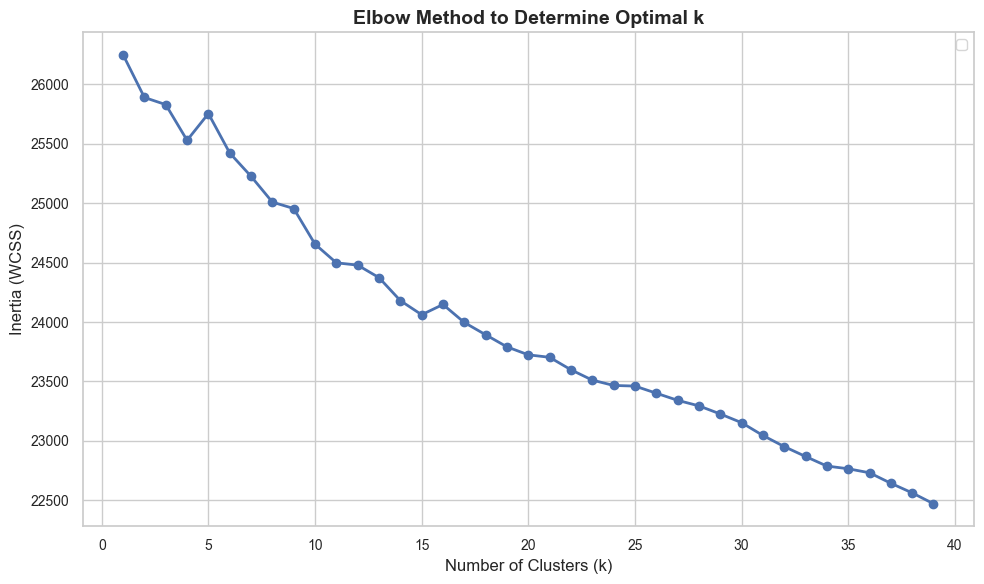

In [83]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Elbow curve with Seaborn aesthetic
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', markersize=6, linewidth=2, color=sns.color_palette("deep")[0])

plt.title('Elbow Method to Determine Optimal k', fontsize=14, weight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

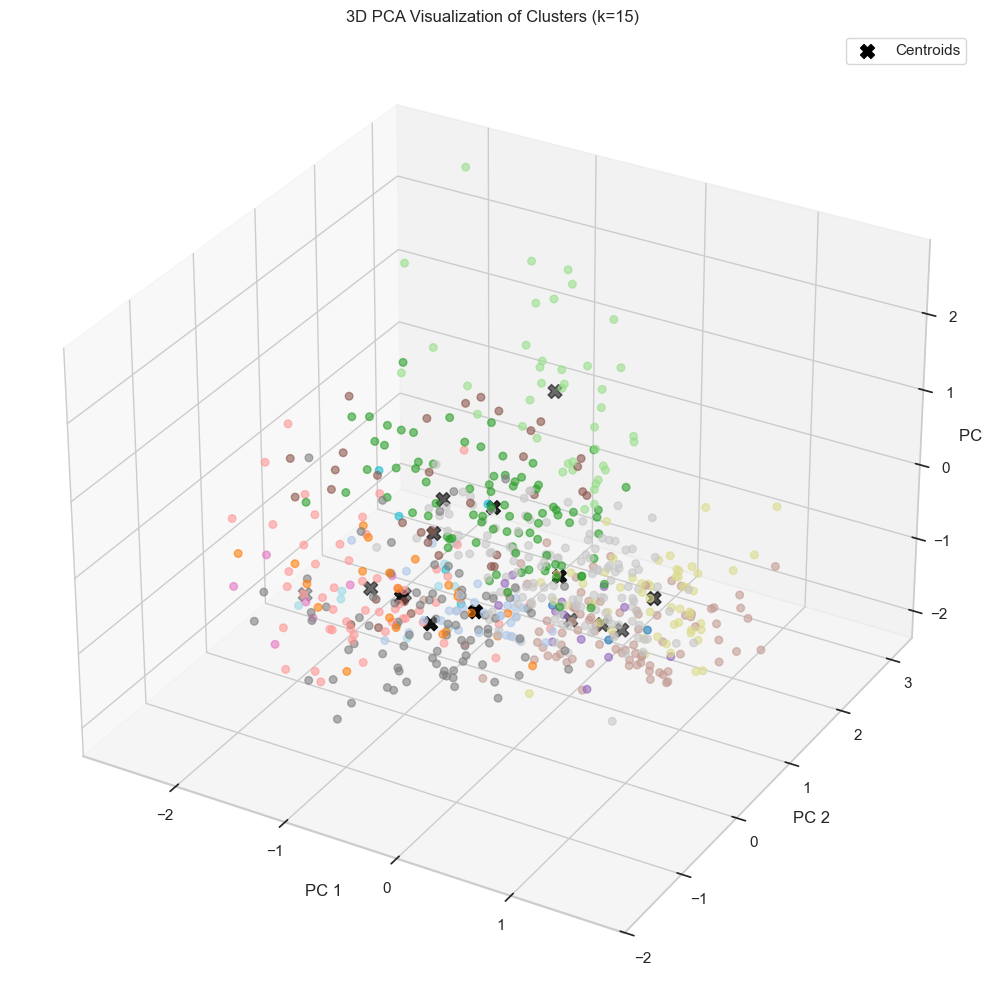

In [87]:
# KMeans clustering
k = 15
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# PCA to reduce to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# 3D plot
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab20', s=30, alpha=0.6)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], c='black', s=100, marker='X', label='Centroids')

ax.set_title(f'3D PCA Visualization of Clusters (k={k})')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
def print_summaries_in_cluster(cluster_num, labels, df):
    indices = [i for i, label in enumerate(labels) if label == cluster_num]
    print(f"Cluster {cluster_num} contains {len(indices)} summaries:\n")
    for i in indices:
        print(f"{i}: {df.loc[i, 'summary'][:250]}...\n")  # Truncate preview
        
print_summaries_in_cluster(10, kmeans.labels_, df)


Cluster 10 contains 85 summaries:

11: in today's session, we first analyzed the summaries we write after every class using the pivot table in excel, in which we see the number of people who submitted the summary, the average word length of summaries, the minimum number of characters in a...

16: in todays class , we first discussed about exploratory data analysis. we explored pivot table tool in excel . in which we worked first with the class data of summaries which we submit. we learnt how to arrange data according to different parameters, ...

26: during exploratory data analysis we get insights on type of data and understand problems present in the data. we can remove outliers based on trend followed by data: if all data follows a particular trend and some doesn't follow we can remove this da...

50: today's class started with a brief discussion on our upcoming projects and assignments. then we moved onto encoding of categorical variables. we studied in brief various encoding metho

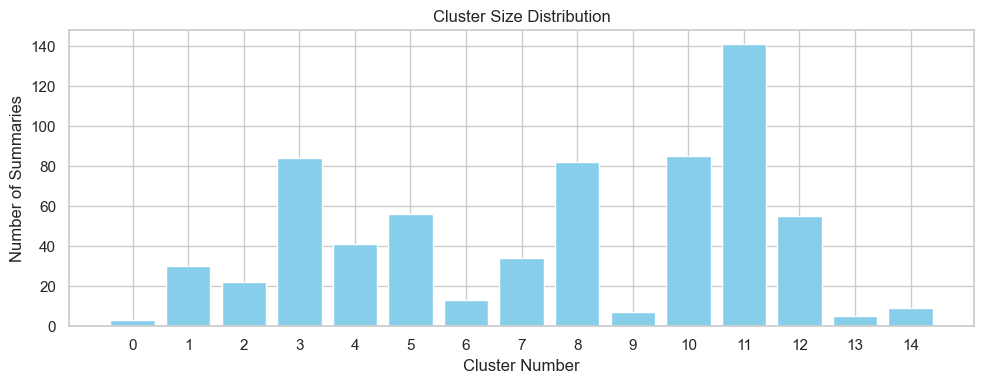

In [89]:
from collections import Counter
import matplotlib.pyplot as plt

cluster_counts = Counter(kmeans.labels_)
sorted_counts = sorted(cluster_counts.items())

clusters, counts = zip(*sorted_counts)

plt.figure(figsize=(10, 4))
plt.bar(clusters, counts, color='skyblue')
plt.xlabel("Cluster Number")
plt.ylabel("Number of Summaries")
plt.title("Cluster Size Distribution")
plt.xticks(range(len(clusters)))
plt.tight_layout()
plt.show()